# Machine Learning for EDS assignment
## Imports
First we import the required libraries

In [2]:
!python3.11 -m pip install scikit-plot

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_confusion_matrix

## Loading the data
We load the data into pandas DataFrames

In [4]:
train_df = pd.read_csv("data/data_banknote_authentication_train.csv")
test_df = pd.read_csv("data/data_banknote_authentication_test.csv")
val_df = pd.read_csv("data/data_banknote_authentication_val.csv")

## Ex.1: Exploring the data

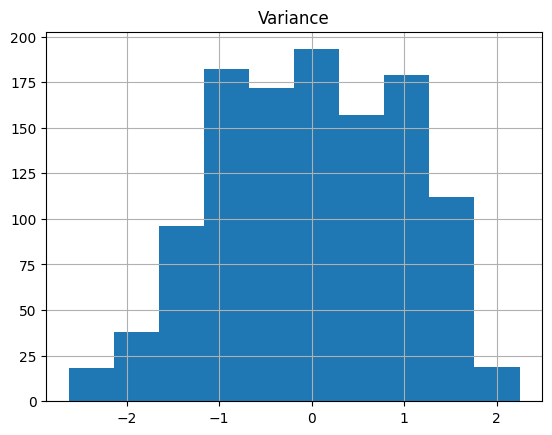

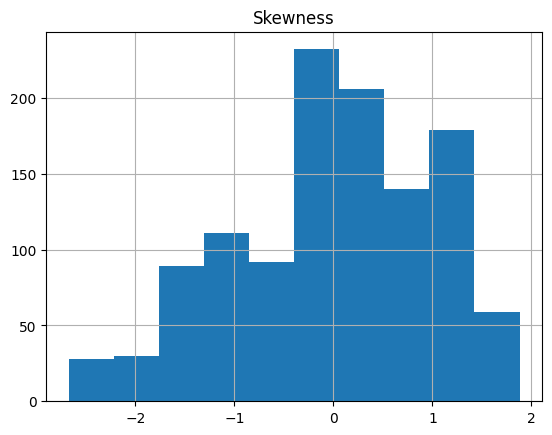

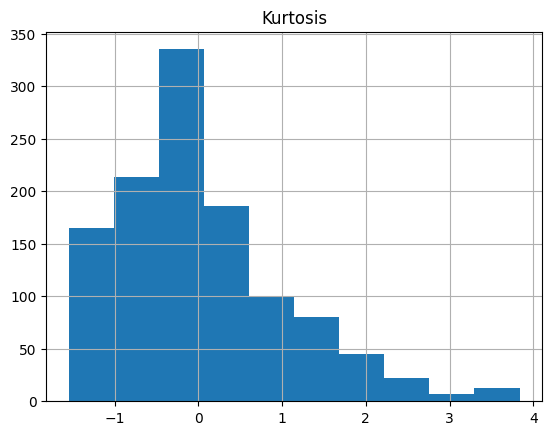

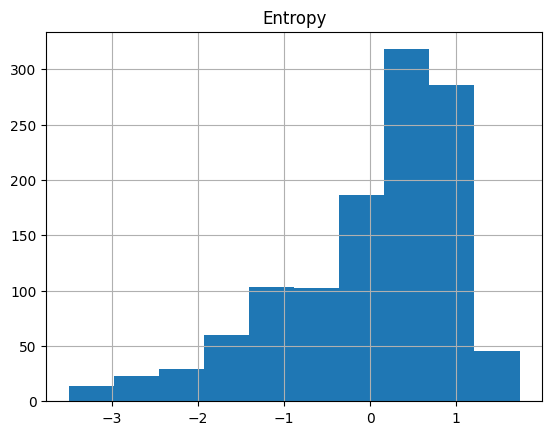

In [5]:
train_val_df = pd.concat([train_df, val_df])
train_val_df["variance"].hist()
plt.title("Variance")
plt.show()
train_val_df["skewness"].hist()
plt.title("Skewness")

plt.show()
train_val_df["kurtosis"].hist()
plt.title("Kurtosis")

plt.show()
train_val_df["entropy"].hist()
plt.title("Entropy")
plt.show()

## Ex 2. Linear SVM

Accuracy {'variance', 'skewness'}: 0.8689320388349514
Accuracy {'variance', 'kurtosis'}: 0.8203883495145631
Accuracy {'variance', 'entropy'}: 0.8543689320388349
Accuracy {'skewness', 'kurtosis'}: 0.7864077669902912
Accuracy {'skewness', 'entropy'}: 0.6990291262135923
Accuracy {'entropy', 'kurtosis'}: 0.6310679611650486


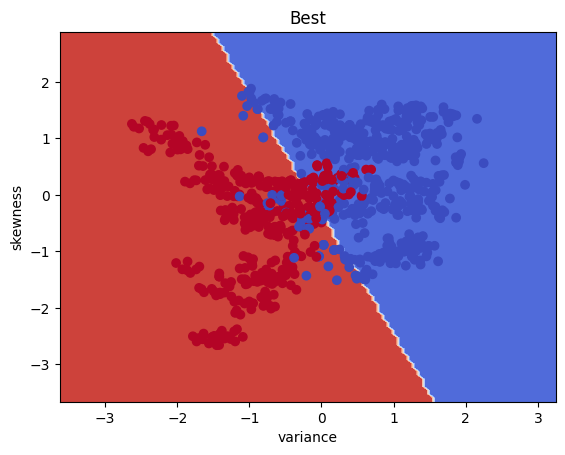

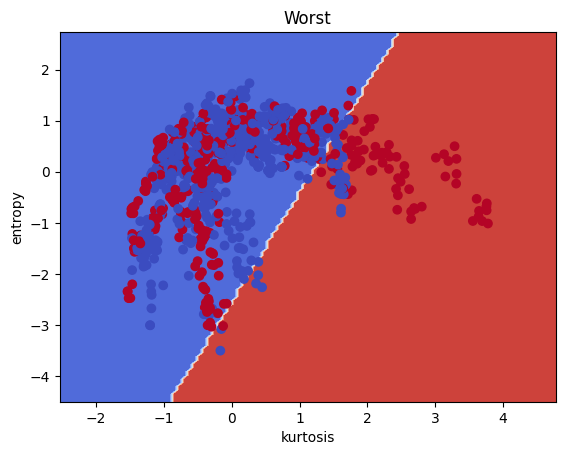

In [6]:
from itertools import combinations

features = ["variance", "skewness", "kurtosis", "entropy"]
models = []
model_accuracy = []
model_features = []

for f in combinations(features, 2):
    f = list(f)
    model_features.append(f)
    models.append(SVC(kernel='linear', C=1))
    models[-1].fit(train_df[f], train_df["class"])
    model_accuracy.append(models[-1].score(val_df[f], val_df["class"]))
    print(f'Accuracy {set(f)}: {model_accuracy[-1]}')

model_accuracy = np.array(model_accuracy)
model_accuracy.argmax(),model_accuracy.argmax()

DecisionBoundaryDisplay.from_estimator(models[model_accuracy.argmax()], train_df[model_features[model_accuracy.argmax()]], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[model_features[model_accuracy.argmax()][0]], train_df[model_features[model_accuracy.argmax()][1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Best")
plt.show()

DecisionBoundaryDisplay.from_estimator(models[model_accuracy.argmin()], train_df[model_features[model_accuracy.argmin()]], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[model_features[model_accuracy.argmin()][0]], train_df[model_features[model_accuracy.argmin()][1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Worst")
plt.show()

## Ex. 3: RBF Kernel

C: 0.0001, gamma: 0.001, accuracy: 0.5679611650485437
C: 0.01, gamma: 0.1, accuracy: 0.8640776699029126
C: 0.01, gamma: 1, accuracy: 0.9174757281553398
C: 1, gamma: 1, accuracy: 0.9223300970873787


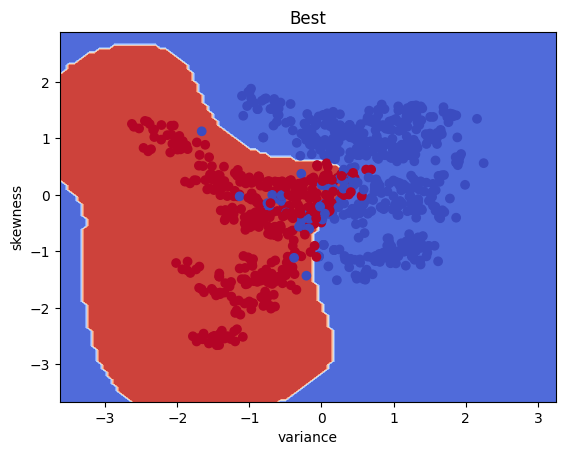

In [7]:
best_model = model_features[model_accuracy.argmax()]
best_model

C_options = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_options = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

rbf_models = []
rbf_model_accuracy = []
rbf_values = []
best = 0

for C in C_options:
    for gamma in gamma_options:
        rbf_values.append((C, gamma))
        rbf_models.append(SVC(kernel="rbf", C=C, gamma=gamma))
        rbf_models[-1].fit(train_df[best_model], train_df["class"])
        rbf_model_accuracy.append(rbf_models[-1].score(val_df[best_model], val_df["class"]))
        if rbf_model_accuracy[-1] > best:
            print(f"C: {C}, gamma: {gamma}, accuracy: {rbf_model_accuracy[-1]}")
            best = rbf_model_accuracy[-1]


rbf_model_accuracy = np.array(rbf_model_accuracy)
DecisionBoundaryDisplay.from_estimator(rbf_models[rbf_model_accuracy.argmax()], train_df[best_model], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[best_model[0]], train_df[best_model[1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Best")
plt.show()

## Ex. 4: Overfitting?

SVC(C=1, gamma=0.001)
train accuracy: 0.88125
val accuracy: 0.8640776699029126
SVC(C=1, gamma=0.01)
train accuracy: 0.896875
val accuracy: 0.8689320388349514
SVC(C=1, gamma=0.1)
train accuracy: 0.9135416666666667
val accuracy: 0.9174757281553398
SVC(C=1, gamma=1)
train accuracy: 0.940625
val accuracy: 0.9223300970873787
SVC(C=1, gamma=10)
train accuracy: 0.9458333333333333
val accuracy: 0.9029126213592233
SVC(C=1, gamma=100)
train accuracy: 0.9770833333333333
val accuracy: 0.912621359223301
SVC(C=1, gamma=1000)
train accuracy: 0.9958333333333333
val accuracy: 0.7572815533980582


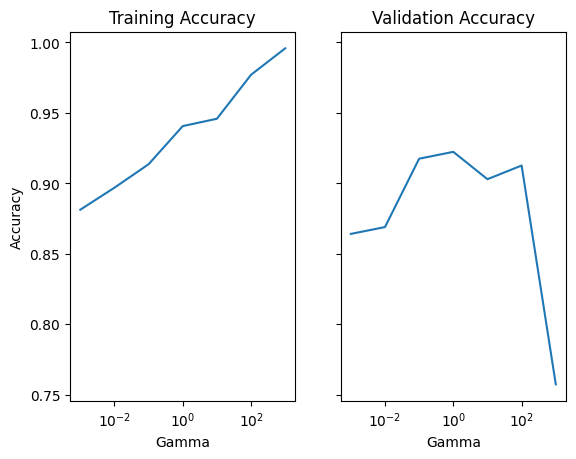

In [8]:
c_fixed_models = rbf_models[28:35]
c_fixed_values = [gamma for _, gamma in rbf_values[28:35]]
train_acc = []
val_acc = []

for m in c_fixed_models:
    print(m)
    train_acc.append(m.score(train_df[best_model], train_df["class"]))
    val_acc.append(m.score(val_df[best_model], val_df["class"]))
    print(f'train accuracy: {train_acc[-1]}')
    print(f'val accuracy: {val_acc[-1]}')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(c_fixed_values, train_acc)
ax1.set_xscale("log")
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Gamma")
ax1.set_ylabel("Accuracy")
ax2.plot(c_fixed_values, val_acc)
ax2.set_xscale("log")
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Gamma")


plt.show()

For large values of gamma overfitting is clearly visible, because training accuracy increases but validation accuracy does not.

## Ex 5: Number of support vectors

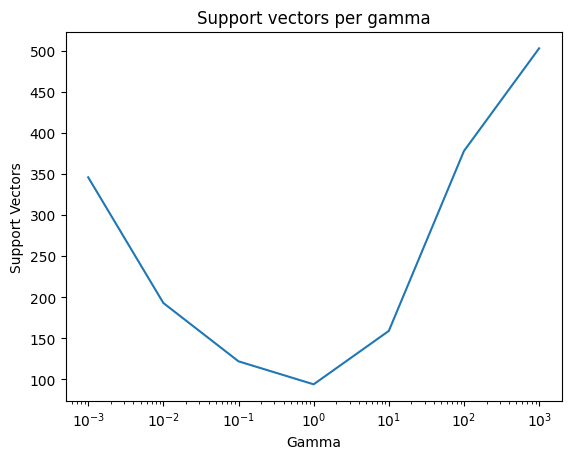

In [9]:
supp_vectors_c_fixed = [m.n_support_[0] for m in c_fixed_models]

plt.plot(c_fixed_values, supp_vectors_c_fixed)
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Support Vectors")
plt.title("Support vectors per gamma")
plt.show()

## Ex. 6: Redo everything for polynomial

C: 0.0001, d: 1, accuracy: 0.5679611650485437
C: 0.0001, d: 5, accuracy: 0.6019417475728155
C: 0.0001, d: 7, accuracy: 0.6407766990291263
C: 0.0001, d: 9, accuracy: 0.6553398058252428
C: 0.001, d: 3, accuracy: 0.6796116504854369
C: 0.001, d: 5, accuracy: 0.6844660194174758
C: 0.001, d: 7, accuracy: 0.6893203883495146
C: 0.01, d: 1, accuracy: 0.8689320388349514


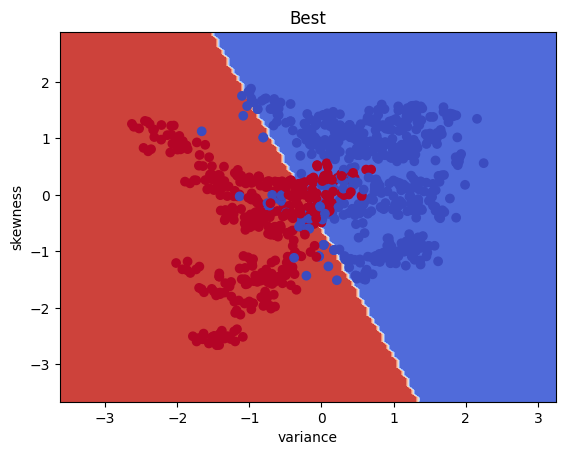

In [10]:
C_options = [0.0001, 0.001, 0.01, 0.1, 1, 10]
d_options = [1,2,3,4,5,6,7,8,9,10]

poly_models = []
poly_model_accuracy = []
poly_values = []
best = 0

for C in C_options:
    for d in d_options:
        poly_values.append((C, d))
        poly_models.append(SVC(kernel="poly", C=C, degree=d, coef0 = 0))
        poly_models[-1].fit(train_df[best_model], train_df["class"])
        poly_model_accuracy.append(poly_models[-1].score(val_df[best_model], val_df["class"]))
        if poly_model_accuracy[-1] > best:
            print(f"C: {C}, d: {d}, accuracy: {poly_model_accuracy[-1]}")
            best = poly_model_accuracy[-1]


poly_model_accuracy = np.array(poly_model_accuracy)
DecisionBoundaryDisplay.from_estimator(poly_models[poly_model_accuracy.argmax()], train_df[best_model], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[best_model[0]], train_df[best_model[1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Best")
plt.show()

C: 0.0001, d: 1, accuracy: 0.5679611650485437
C: 0.0001, d: 3, accuracy: 0.5825242718446602
C: 0.0001, d: 4, accuracy: 0.6553398058252428
C: 0.0001, d: 5, accuracy: 0.7038834951456311
C: 0.0001, d: 6, accuracy: 0.7233009708737864
C: 0.0001, d: 7, accuracy: 0.7475728155339806
C: 0.0001, d: 8, accuracy: 0.7572815533980582
C: 0.0001, d: 9, accuracy: 0.7718446601941747
C: 0.0001, d: 10, accuracy: 0.8058252427184466
C: 0.001, d: 3, accuracy: 0.8106796116504854
C: 0.001, d: 4, accuracy: 0.8349514563106796
C: 0.001, d: 5, accuracy: 0.8786407766990292
C: 0.001, d: 6, accuracy: 0.9077669902912622
C: 0.01, d: 3, accuracy: 0.912621359223301
C: 0.01, d: 4, accuracy: 0.9174757281553398
C: 1, d: 2, accuracy: 0.9223300970873787
C: 100, d: 3, accuracy: 0.9271844660194175


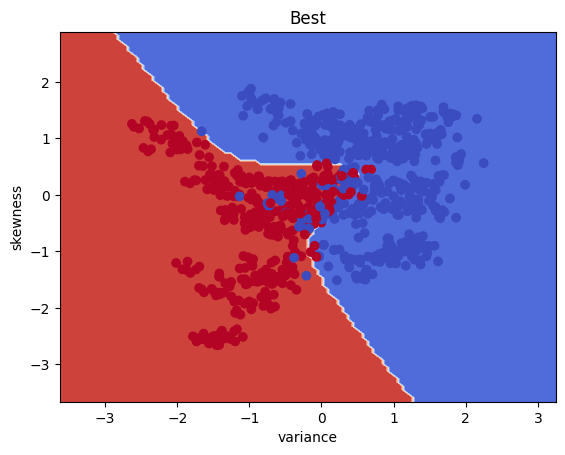

In [11]:
C_options = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
d_options = [1,2,3,4,5,6,7,8,9,10]

poly_models = []
poly_model_accuracy = []
poly_values = []
best = 0

for C in C_options:
    for d in d_options:
        poly_values.append((C, d))
        poly_models.append(SVC(kernel="poly", C=C, degree=d, coef0 = 1))
        poly_models[-1].fit(train_df[best_model], train_df["class"])
        poly_model_accuracy.append(poly_models[-1].score(val_df[best_model], val_df["class"]))
        if poly_model_accuracy[-1] > best:
            print(f"C: {C}, d: {d}, accuracy: {poly_model_accuracy[-1]}")
            best = poly_model_accuracy[-1]


poly_model_accuracy = np.array(poly_model_accuracy)
DecisionBoundaryDisplay.from_estimator(poly_models[poly_model_accuracy.argmax()], train_df[best_model], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[best_model[0]], train_df[best_model[1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Best")
plt.show()

SVC(C=100, coef0=1, degree=1, kernel='poly')
train accuracy: 0.8885416666666667
val accuracy: 0.8689320388349514
SVC(C=100, coef0=1, degree=2, kernel='poly')
train accuracy: 0.9291666666666667
val accuracy: 0.9174757281553398
SVC(C=100, coef0=1, kernel='poly')
train accuracy: 0.9395833333333333
val accuracy: 0.9271844660194175
SVC(C=100, coef0=1, degree=4, kernel='poly')
train accuracy: 0.940625
val accuracy: 0.912621359223301
SVC(C=100, coef0=1, degree=5, kernel='poly')
train accuracy: 0.940625
val accuracy: 0.9223300970873787
SVC(C=100, coef0=1, degree=6, kernel='poly')
train accuracy: 0.94375
val accuracy: 0.912621359223301
SVC(C=100, coef0=1, degree=7, kernel='poly')
train accuracy: 0.94375
val accuracy: 0.912621359223301
SVC(C=100, coef0=1, degree=8, kernel='poly')
train accuracy: 0.94375
val accuracy: 0.9077669902912622
SVC(C=100, coef0=1, degree=9, kernel='poly')
train accuracy: 0.9458333333333333
val accuracy: 0.9077669902912622
SVC(C=100, coef0=1, degree=10, kernel='poly')
tra

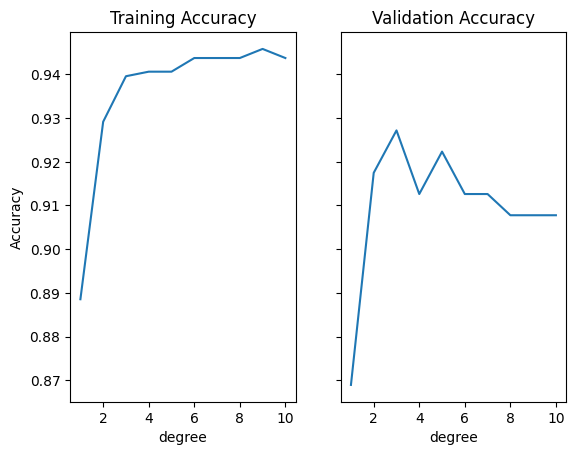

In [12]:
c_fixed_models = poly_models[60:70]
c_fixed_values = [d for _, d in poly_values[60:70]]
train_acc = []
val_acc = []

for m in c_fixed_models:
    print(m)
    train_acc.append(m.score(train_df[best_model], train_df["class"]))
    val_acc.append(m.score(val_df[best_model], val_df["class"]))
    print(f'train accuracy: {train_acc[-1]}')
    print(f'val accuracy: {val_acc[-1]}')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(c_fixed_values, train_acc)
ax1.set_title("Training Accuracy")
ax1.set_xlabel("degree")
ax1.set_ylabel("Accuracy")
ax2.plot(c_fixed_values, val_acc)
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("degree")


plt.show()

Slight overfitting does occur.

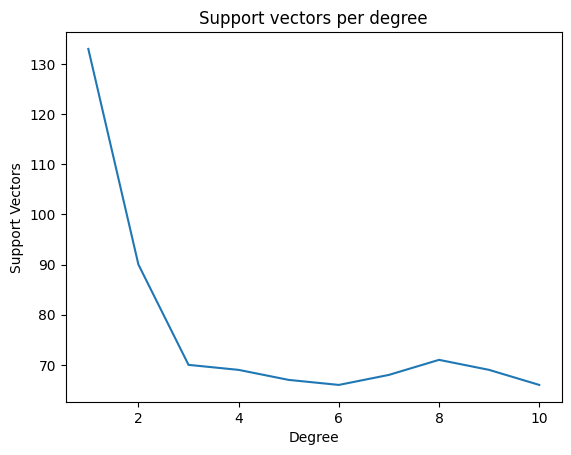

In [13]:
supp_vectors_c_fixed = [m.n_support_[0] for m in c_fixed_models]

plt.plot(c_fixed_values, supp_vectors_c_fixed)
plt.xlabel("Degree")
plt.ylabel("Support Vectors")
plt.title("Support vectors per degree")
plt.show()

## Ex. 7: All features

In [14]:
# Linear
print("LINEAR")
C_options = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

all_lin_models = []
all_lin_model_accuracy = []
all_lin_values = []
best = 0

for C in C_options:
    rbf_values.append(C)
    all_lin_models.append(SVC(kernel="linear", C=C))
    all_lin_models[-1].fit(train_df[["variance", "skewness", "kurtosis", "entropy"]], train_df["class"])
    all_lin_model_accuracy.append(all_lin_models[-1].score(val_df[["variance", "skewness", "kurtosis", "entropy"]], val_df["class"]))
    if all_lin_model_accuracy[-1] > best:
        print(f"C: {C}, accuracy: {all_lin_model_accuracy[-1]}")
        best = all_lin_model_accuracy[-1]

# RBF
print("RBF")
gamma_options = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

all_rbf_models = []
all_rbf_model_accuracy = []
all_rbf_values = []
best = 0

for C in C_options:
    for gamma in gamma_options:
        all_rbf_values.append((C, gamma))
        all_rbf_models.append(SVC(kernel="rbf", C=C, gamma=gamma))
        all_rbf_models[-1].fit(train_df[["variance", "skewness", "kurtosis", "entropy"]], train_df["class"])
        all_rbf_model_accuracy.append(all_rbf_models[-1].score(val_df[["variance", "skewness", "kurtosis", "entropy"]], val_df["class"]))
        if all_rbf_model_accuracy[-1] > best:
            print(f"C: {C}, gamma: {gamma}, accuracy: {all_rbf_model_accuracy[-1]}")
            best = all_rbf_model_accuracy[-1]

# Poly
print("POLY")
d_options = [1,2,3,4,5,6,7,8,9,10]

all_poly_models = []
all_poly_model_accuracy = []
all_poly_values = []
best = 0

for C in C_options:
    for d in d_options:
        all_poly_values.append((C, d))
        all_poly_models.append(SVC(kernel="poly", C=C, degree=d, coef0 = 1))
        all_poly_models[-1].fit(train_df[["variance", "skewness", "kurtosis", "entropy"]], train_df["class"])
        all_poly_model_accuracy.append(all_poly_models[-1].score(val_df[["variance", "skewness", "kurtosis", "entropy"]], val_df["class"]))
        if all_poly_model_accuracy[-1] > best:
            print(f"C: {C}, d: {d}, accuracy: {all_poly_model_accuracy[-1]}")
            best = all_poly_model_accuracy[-1]

LINEAR
C: 0.0001, accuracy: 0.5679611650485437
C: 0.001, accuracy: 0.8203883495145631
C: 0.01, accuracy: 0.9854368932038835
C: 0.1, accuracy: 0.9951456310679612
RBF
C: 0.0001, gamma: 0.001, accuracy: 0.5679611650485437
C: 0.01, gamma: 0.1, accuracy: 0.8786407766990292
C: 0.1, gamma: 0.01, accuracy: 0.9174757281553398
C: 0.1, gamma: 0.1, accuracy: 0.9854368932038835
C: 0.1, gamma: 1, accuracy: 1.0
POLY
C: 0.0001, d: 1, accuracy: 0.5679611650485437
C: 0.0001, d: 3, accuracy: 0.5728155339805825
C: 0.0001, d: 4, accuracy: 0.5922330097087378
C: 0.0001, d: 5, accuracy: 0.6747572815533981
C: 0.0001, d: 6, accuracy: 0.6941747572815534
C: 0.0001, d: 7, accuracy: 0.7038834951456311
C: 0.0001, d: 8, accuracy: 0.7184466019417476
C: 0.0001, d: 9, accuracy: 0.7378640776699029
C: 0.0001, d: 10, accuracy: 0.7621359223300971
C: 0.001, d: 4, accuracy: 0.7815533980582524
C: 0.001, d: 5, accuracy: 0.9029126213592233
C: 0.001, d: 6, accuracy: 0.9466019417475728
C: 0.001, d: 7, accuracy: 0.9854368932038835


lin_acc=0.9757281553398058, rbf_acc=0.9902912621359223, poly_acc=0.6359223300970874


<Axes: title={'center': 'Poly'}, xlabel='Predicted label', ylabel='True label'>

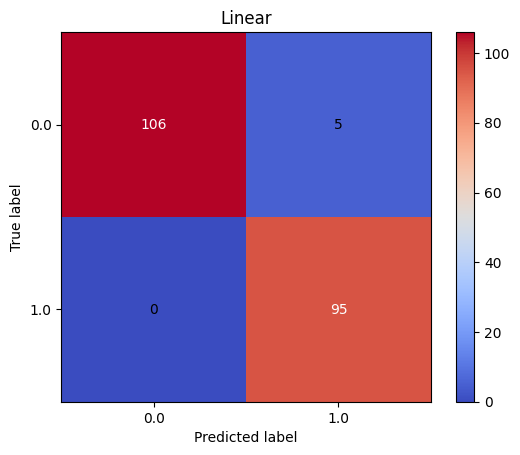

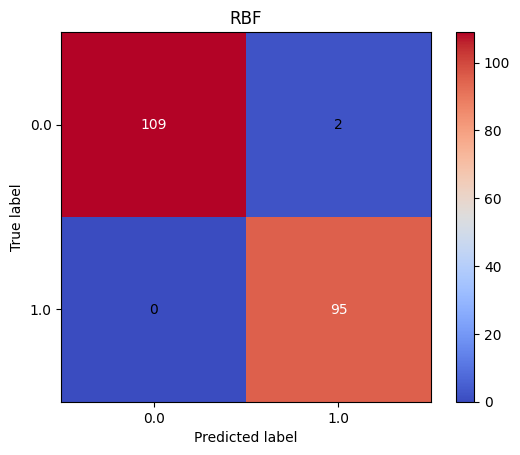

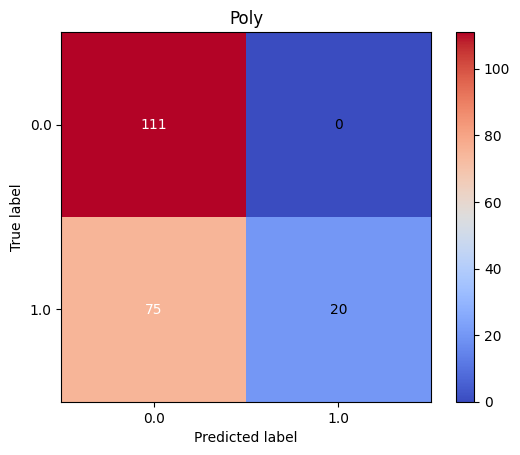

In [15]:
C_lin = 0.1

C_rbf = 0.1
gamma_rbf = 1

C_poly = 0.001
d_poly = 8

svm_lin = SVC(kernel="linear", C=C_lin)
svm_rbf = SVC(kernel="rbf", C=C_rbf, gamma=gamma_rbf)
svm_poly = SVC(kernel="poly", C=C_poly, degree=d_poly)

svm_lin.fit(train_val_df[["variance", "skewness", "kurtosis", "entropy"]], train_val_df["class"])
svm_rbf.fit(train_val_df[["variance", "skewness", "kurtosis", "entropy"]], train_val_df["class"])
svm_poly.fit(train_val_df[["variance", "skewness", "kurtosis", "entropy"]], train_val_df["class"])

lin_acc = svm_lin.score(test_df[["variance", "skewness", "kurtosis", "entropy"]], test_df["class"])
rbf_acc = svm_rbf.score(test_df[["variance", "skewness", "kurtosis", "entropy"]], test_df["class"])
poly_acc = svm_poly.score(test_df[["variance", "skewness", "kurtosis", "entropy"]], test_df["class"])

print(f"{lin_acc=}, {rbf_acc=}, {poly_acc=}")

plot_confusion_matrix(y_true = test_df["class"], 
                      y_pred = svm_lin.predict(test_df[["variance", "skewness", "kurtosis", "entropy"]]), 
                      cmap = plt.cm.coolwarm,    # Choose a prefered color map
                      title = 'Linear')

plot_confusion_matrix(y_true = test_df["class"], 
                      y_pred = svm_rbf.predict(test_df[["variance", "skewness", "kurtosis", "entropy"]]), 
                      cmap = plt.cm.coolwarm,    # Choose a prefered color map
                      title = 'RBF')

plot_confusion_matrix(y_true = test_df["class"], 
                      y_pred = svm_poly.predict(test_df[["variance", "skewness", "kurtosis", "entropy"]]), 
                      cmap = plt.cm.coolwarm,    # Choose a prefered color map
                      title = 'Poly')

## Ex. 8: Penalize specific errors

No code.

## Ex. 9: Using libsvm

No code.

## Ex. 10: Modified SVM

Accuracy {'variance', 'skewness'}: 0.8689320388349514


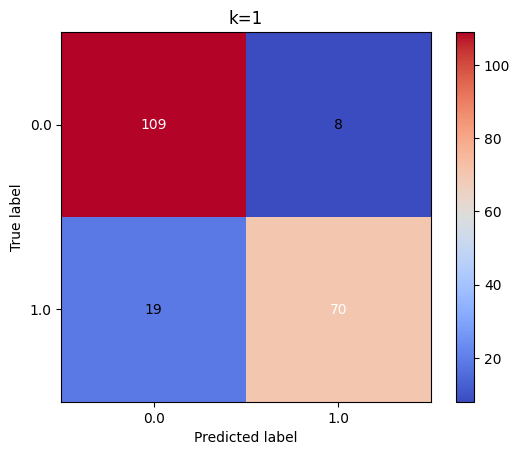

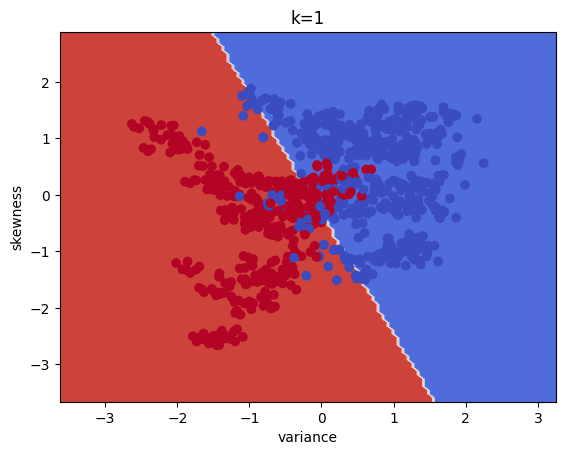

Accuracy {'variance', 'skewness'}: 0.8543689320388349


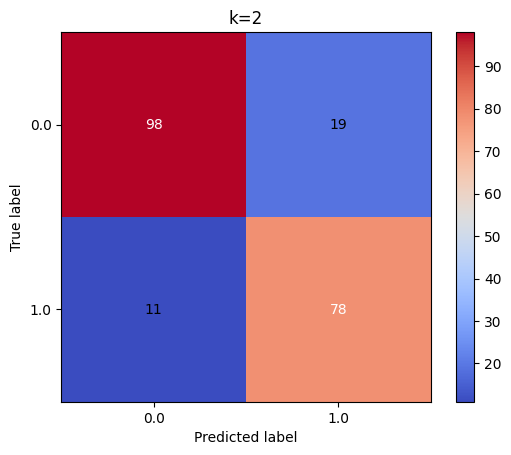

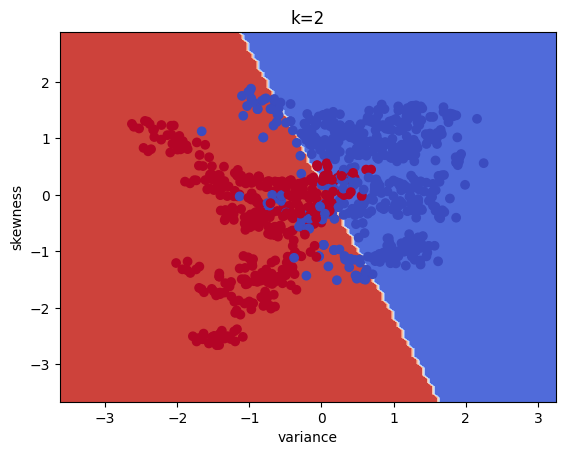

Accuracy {'variance', 'skewness'}: 0.7766990291262136


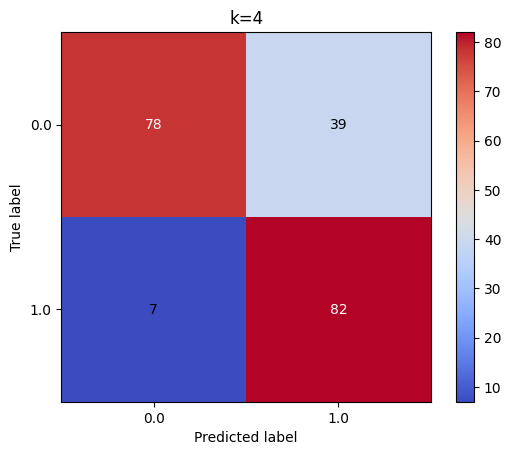

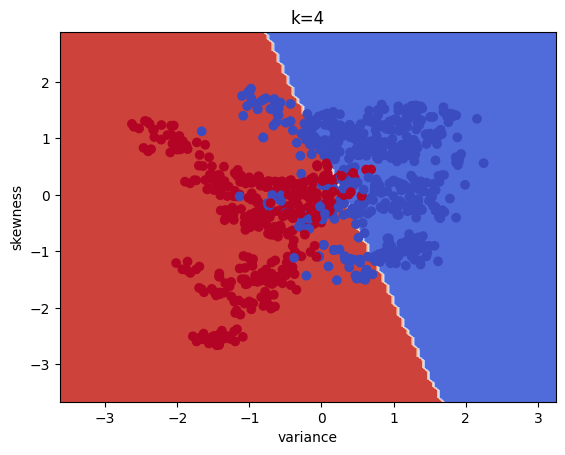

Accuracy {'variance', 'skewness'}: 0.7184466019417476


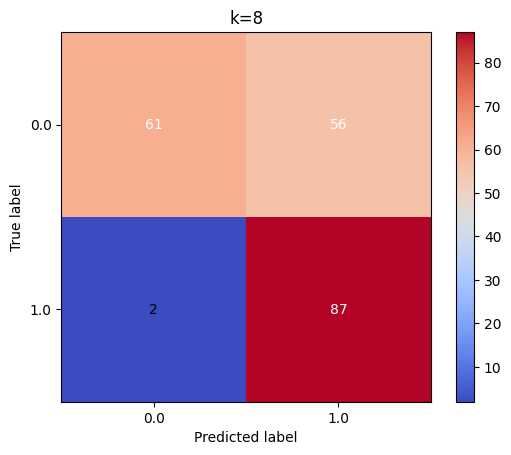

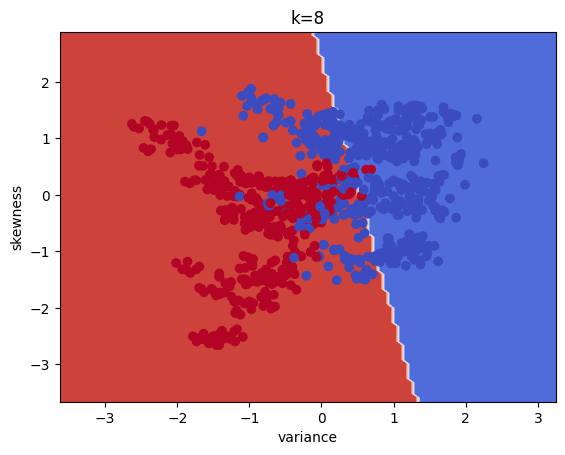

In [18]:
k_options = [1, 2, 4, 8]
k_models = []
selected_features = ['variance', 'skewness']

for k in k_options:
    k_models.append(SVC(kernel='linear', C=1, class_weight={0: 1, 1: k}))
    k_models[-1].fit(train_df[selected_features], train_df["class"])
    print(f'Accuracy {set(selected_features)}: {k_models[-1].score(val_df[selected_features], val_df["class"])}')

    plot_confusion_matrix(y_true = val_df["class"], 
                      y_pred = k_models[-1].predict(val_df[selected_features]), 
                      cmap = plt.cm.coolwarm,    # Choose a prefered color map
                      title = f'k={k}')
    
    plt.show()

    DecisionBoundaryDisplay.from_estimator(k_models[-1], train_df[selected_features], response_method="predict", cmap=plt.cm.coolwarm)
    plt.scatter(train_df[selected_features[0]], train_df[selected_features[1]], c=train_df["class"], cmap=plt.cm.coolwarm)
    plt.title(f"k={k}")
    plt.show()
